Feature Engineering

In [1]:
data = [{'grade':85, 'siblings':4, 'lessons':'math'},
        {'grade':77, 'siblings':2, 'lessons':'che'},
        {'grade':34, 'siblings':1, 'lessons':'bio'},
        {'grade':92, 'siblings':3, 'lessons':'physics'}]

In [2]:
from sklearn.feature_extraction import DictVectorizer

In [3]:
vec=DictVectorizer(sparse=False,dtype=int)

In [9]:
vec.fit_transform(data)

array([[85,  0,  0,  1,  0,  4],
       [77,  0,  1,  0,  0,  2],
       [34,  1,  0,  0,  0,  1],
       [92,  0,  0,  0,  1,  3]])

In [7]:
feature_names = vec.get_feature_names_out()

In [8]:
print(feature_names)

['grade' 'lessons=bio' 'lessons=che' 'lessons=math' 'lessons=physics'
 'siblings']


In [11]:
vek=DictVectorizer(sparse=True,dtype=int)
vek.fit_transform(data)

<4x6 sparse matrix of type '<class 'numpy.int32'>'
	with 12 stored elements in Compressed Sparse Row format>

In [12]:
datas=[
    'The weather is nice',
    'good people',
    'the weather is bad'
]

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

In [14]:
vek=CountVectorizer()

In [15]:
X=vek.fit_transform(datas)
X

<3x7 sparse matrix of type '<class 'numpy.int64'>'
	with 10 stored elements in Compressed Sparse Row format>

In [16]:
import pandas as pd

In [18]:
pd.DataFrame(X.toarray(),columns=vek.get_feature_names_out())

,bad,good,is,nice,people,the,weather
0,0,0,1,1,0,1,1
1,0,1,0,0,1,0,0
2,1,0,1,0,0,1,1


In [19]:
import numpy as np
import matplotlib.pyplot as plt

In [20]:
x=np.array([1,2,3,4,5])
y=np.array([5,3,1,2,7])

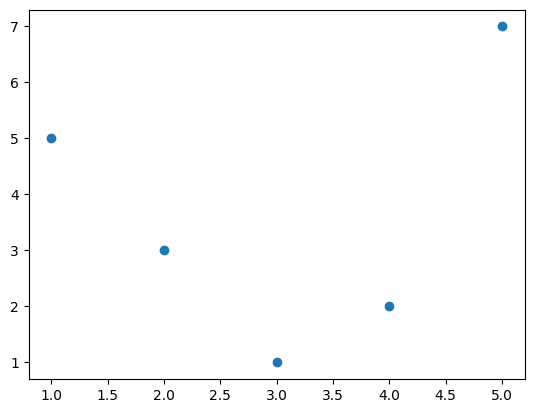

In [21]:
plt.scatter(x,y)

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
X=x[:,np.newaxis]

In [24]:
model=LinearRegression().fit(X,y)

In [25]:
y_fit=model.predict(X)

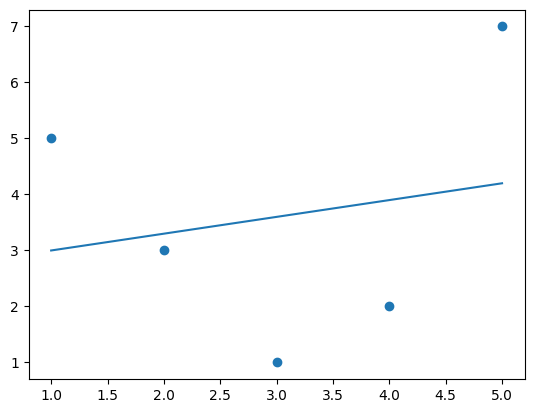

In [26]:
plt.scatter(x,y)
plt.plot(x,y_fit)

In [27]:
from sklearn.preprocessing import PolynomialFeatures

In [28]:
pol=PolynomialFeatures(degree=3, include_bias=False)

In [29]:
X2=pol.fit_transform(X)
X2

array([[  1.,   1.,   1.],
       [  2.,   4.,   8.],
       [  3.,   9.,  27.],
       [  4.,  16.,  64.],
       [  5.,  25., 125.]])

In [30]:
model=LinearRegression().fit(X2,y)

In [35]:
y_fit=model.predict(X2)

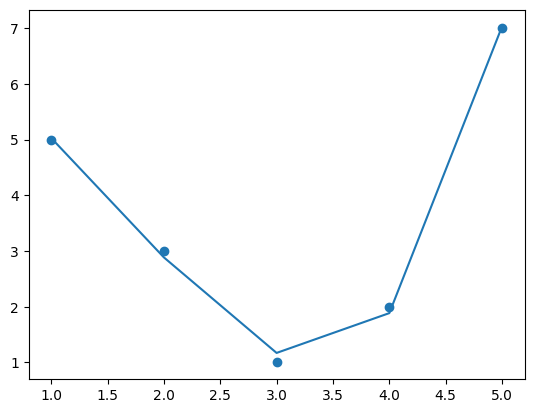

In [36]:
plt.scatter(x,y)
plt.plot(x,y_fit)

In [33]:
from numpy import nan

In [37]:
X=np.array([[1,nan,3],
          [5,6,9],
          [4,5,2],
          [4,6,nan],
          [9,8,1]])

y=np.array([10,13,-2,7,-6])

In [39]:
from sklearn.impute import SimpleImputer

In [41]:
imp=SimpleImputer(strategy='mean')

In [43]:
X2=imp.fit_transform(X)
X2

array([[1.  , 6.25, 3.  ],
       [5.  , 6.  , 9.  ],
       [4.  , 5.  , 2.  ],
       [4.  , 6.  , 3.75],
       [9.  , 8.  , 1.  ]])

In [44]:
model=LinearRegression().fit(X2,y)
model.predict(X2)

array([10.59852491, 13.45464873, -1.31399837,  4.99263952, -5.7318148 ])

In [45]:
from sklearn.pipeline import make_pipeline

In [47]:
model=make_pipeline(SimpleImputer(strategy='mean'),
                   PolynomialFeatures(degree=2),
                   LinearRegression())

In [48]:
model.fit(X,y)
print(y)
print(model.predict(X))

[10 13 -2  7 -6]
[10. 13. -2.  7. -6.]
